In [1]:
# widget packages
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

In [2]:
# shares in the population
xA = .75       # probability of interacting with A player
xB = (1 - xA)  # probability of interacting with B player

# SET PARAMETERS OF THE GAME

    # A    B
#A (a,a)  (b,c)
#B (c,b)  (d,d)

# PD
#a=3; b=1; c=4; d=2

# STAG HUNT
a=4; b=1; c=3.5; d=2

# Original
# payoffs a > c and b < d
# payoffs
#a = 2; b = 3; c = 1; d = 4

# fitness for the player who is playing A
fA = xA * a + xB * b
# fitness for the player who is playing B
fB = xA * c + xB * d

print(fA)
print(fB)

3.25
3.125


In [3]:
# average fitness
f = xA * fA + (1 - xA) * fB
print(f)

3.21875


In [43]:
# IMPORTANT FUNCTIONS

import matplotlib.pyplot as plt
%matplotlib inline


def run_simulation(a,b,c,d,xA0=0.5,n=200):
    # xA = probability of interacting with A player (population proportion)
    # xB = probability of interacting with B player (population proportion)
    xA = [xA0] # A Population String, Init Humanly definded
    xB = [1 - xA[0]]
    dt = 0.1
    # fitness of A and B
    FA = [(xA[0] * a + xB[0] * b) * dt]
    FB = [(xA[0] * c + xB[0] * d) * dt]
    # average fitness
    F = [(xA[0] * (xA[0] * a + xB[0] * b) + xB[0] * (xA[0] * c + xB[0] * d)) * dt]
    
    for t in range(n):
        # fitnesses
        fA = xA[t] * a + xB[t] * b
        fB = xA[t] * c + xB[t] * d
        f = xA[t] * fA + xB[t] * fB
        FA.append(fA*dt)
        FB.append(fB*dt)
        F.append(f*dt)
        # differential equations
        xA.append(xA[t] + (xA[t] * (fA - f)) * dt)
        xB.append(xB[t] + (xB[t] * (fB - f)) * dt)
    return xA,xB,FA,FB,F

def plot_simulation(xA,xB,FA,FB,F):
    plt.plot(xA, 'r', label ='share of strategy A')
    plt.plot(xB, 'b', label ='share of strategy B')
    plt.plot(FA, 'r--', label ='fitness of strategy A')
    plt.plot(FB, 'b--', label ='fitness of strategy B')
    plt.plot(F, 'g--', label ='mean population fitness')
    plt.ylabel('Population Proportion')
    plt.xlabel('Generations')
    plt.grid()
    plt.ylim(0, 1)
    plt.legend(loc='best')
    
    plt.show()
    
def calculate_equilibria():
    xA, xB = symbols('xA, xB')
    dA = xA * ((a*xA + b*xB) - (xA * (a*xA + b*xB) + xB * (c*xA + d*xB)))
    dB = xB * ((c*xA + d*xB) - (xA * (a*xA + b*xB) + xB * (c*xA + d*xB)))

    # use sympy's way of setting equations to zero
    AEqual = Eq(dA, 0)
    BEqual = Eq(dB, 0)
    # compute fixed points
    equilibria = solve([AEqual, BEqual], [xA, xB])
    print(equilibria)
    
    
# use sympy to calculate steady states
from sympy import *

#a = 2; b = 3; c = 1; d = 4
#a = 4; b = 3; c = 1; d = 5
def calculate_equilibria():
    xA, xB = symbols('xA, xB')
    dA = xA * ((a*xA + b*xB) - (xA * (a*xA + b*xB) + xB * (c*xA + d*xB)))
    dB = xB * ((c*xA + d*xB) - (xA * (a*xA + b*xB) + xB * (c*xA + d*xB)))

    # use sympy's way of setting equations to zero
    AEqual = Eq(dA, 0)
    BEqual = Eq(dB, 0)
    # compute fixed points
    equilibria = solve([AEqual, BEqual], [xA, xB])
    print(equilibria)

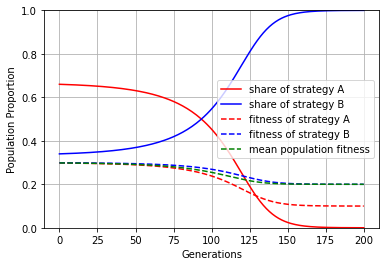

In [44]:
a=4; b=1; c=3.5; d=2; xA0=0.66;n=200
xA,xB,FA,FB,F = run_simulation(a,b,c,d,xA0,n)
plot_simulation(xA,xB,FA,FB,F)

In [45]:
calculate_equilibria()

[(0.0, 0.0), (0.0, 1.00000000000000), (0.666666666666667, 0.333333333333333), (1.00000000000000, 0.0)]


In [46]:
text = widgets.Text(
       value='My Text',
        description='Title', )

display(text)

Text(value='My Text', description='Title')

In [70]:
# Now Input Values


xA0 = widgets.FloatSlider(
    value=0.66,
    min=0,
    max=1,
    step=0.01,
    description='Initial A:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f'
)



n = widgets.IntSlider(
    value=200,
    min=50,
    max=500,
    step=10,
    description='Steps:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)


cc = widgets.FloatSlider(
    value=4,
    min=-10,
    max=10,
    step=0.1,
    description='CC:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)


cd = widgets.FloatSlider(
    value=1,
    min=-10,
    max=10,
    step=0.1,
    description='CD:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)


dc = widgets.FloatSlider(
    value=3.5,
    min=-10,
    max=10,
    step=0.1,
    description='DC:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)


dd = widgets.FloatSlider(
    value=2,
    min=-10,
    max=10,
    step=0.1,
    description='DD:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)


sim_butt = widgets.Button(description='Plot Population')
def on_butt_clicked(_): #This _ does nothing but its required as input
    with outt:
        clear_output()
        xA,xB,FA,FB,F = run_simulation(cc.value,cd.value,dc.value,dd.value,xA0.value,n.value)
        plot_simulation(xA,xB,FA,FB,F)

sim_butt.on_click(on_butt_clicked)
# display
#widgets.VBox([butt,outt])

equi_butt = widgets.Button(description='Plot ES Equilibria')
def on_butt_clicked(_):
    with outt:
        clear_output()
        calculate_equilibria()

equi_butt.on_click(on_butt_clicked)

clear_butt = widgets.Button(description='Clear Output')
#clear_outt = widgets.Output()
def on_butt_clicked(_):
    with outt:
        clear_output()
        
        
text = widgets.Text(
       value='My Text',
       description='Title', )

clear_butt.on_click(on_butt_clicked)

outt = widgets.Output()


# display
buttons = widgets.VBox([xA0,n,cc,cd,dc,dd,sim_butt,equi_butt,clear_butt])
widgets.VBox([buttons,outt])

In [73]:
from ipywidgets.embed import embed_minimal_html

embed_minimal_html('export.html', views=[xA0,n,cc,cd,dc,dd,sim_butt,equi_butt,clear_butt,buttons,outt], title='Widgets export')